In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_1714/2496470882.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# to understand if your data is imbalanced:
# look at the value counts for the outcome

diabetes_df['Outcome'].value_counts()

#really, this is a dataset where we do not have to use
# over or undersampling because its not THAT imbalanced
# if its 1:100 you definitely want to use over
# or undersampling, but there is some grey area

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Oversampling

In [5]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# resample our training data with RandomOverSampler (naive approach)
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [7]:
# train the model using resampled data
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

/Users/lex/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [8]:
y_pred = model.predict(X_test)

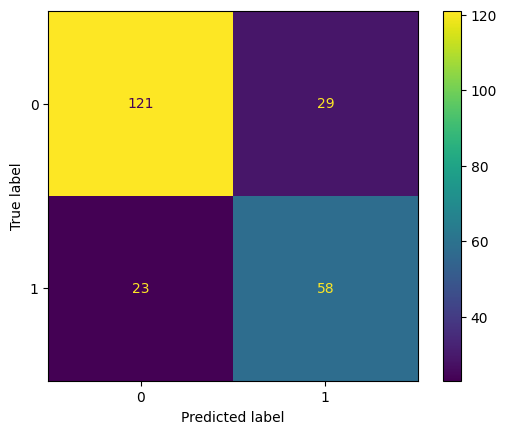

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [10]:
# what is our recall?
# TP/(TP + FN)
58/(58+23)

0.7160493827160493

# Undersampling

In [11]:
# clusterCentroids uses k-means to reduce the number of samples
from imblearn.under_sampling import ClusterCentroids

rus = ClusterCentroids(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [12]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

/Users/lex/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [13]:
y_pred = model.predict(X_test)

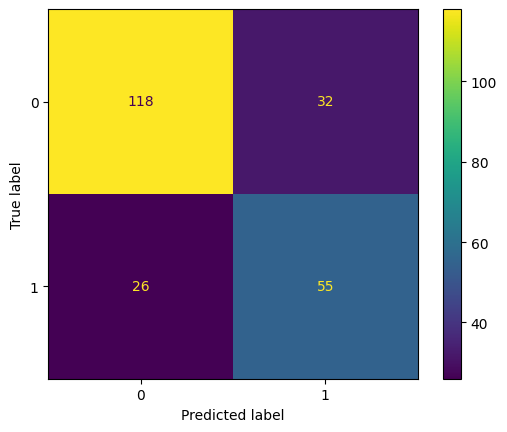

In [14]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [15]:
# recall for undersampling
55/(55+26)

0.6790123456790124